# Part II - Ford Gobike Data Exploration
## by Tala AbuSoud

## Investigation Overview

The goal is to explore and discover insights from a bike-sharing ford gobike dataset, focusing on trip duration and how it varies across user characteristics such as age, gender, user type (subscriber or customer), and hour of day. This presentation aims to highlight key behavioral patterns in how different users engage with the bike sharing system and what factors influence trip duration.

**Key Insights**
- Subscribers have more usage with nearly 160,000 trips compared to 20,000 by Customers.
- Trip durations are right-skewed with most trips lasting under 50 minutes, and only a few very long trips.
- Males take significantly more trips than females or other genders.
- Time of day patterns differ: Subscribers ride most during morning/evening rush hours, while Customers ride more mid-day.
- Younger users tend to take longer trips, with trip duration decreasing steadily with age.

## Dataset Overview and Executive Summary

This dataset contains trip data from the Ford GoBike bike-sharing system in February 2019. It includes trip duration, user type, age, gender, and time and location related information.

**Key Insights**
- Most trips are made by Subscribers, especially males.
- Trip durations are mostly short and right-skewed, with a peak around 5–10 minutes.
- Younger users tend to take longer and more varied trips than older users.
- Clear commuter patterns appear, with peak usage at 8 AM and 5–6 PM, mainly by Subscribers.

In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [15]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [16]:
# simple feature creating (engineering)

# create age column from birth year
df['age'] = 2019 - df['member_birth_year']
df.loc[df['member_birth_year'] == 0, 'age'] = pd.NA 

# convert 'start_time' to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
# create 'start_hour' column
df['start_hour'] = df['start_time'].dt.hour

## Trip Duration Distribution (Log Scale Histogram)

This histogram visualizes the distribution of trip durations on a log scale to handle the highly skewed distribution data. Most trips cluster between 5 to 20 minutes, with a peak around 600 seconds (10 minutes). The log transformation compresses the long tail, making the main usage pattern more visible and easier to interpret. The grid and clear labeling help viewers understand the scale and duration ranges clearly.

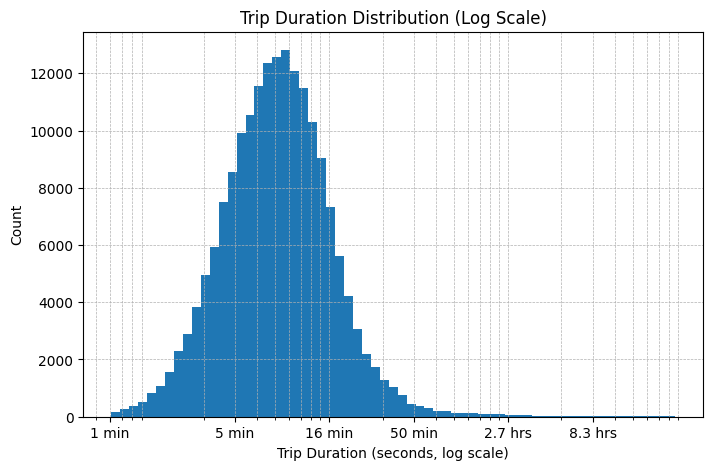

In [17]:
log_binsize = 0.05
bins = 10 ** np.arange(np.log10(df['duration_sec'].min()), 
                       np.log10(df['duration_sec'].max()) + log_binsize, 
                       log_binsize)

plt.figure(figsize=(8,5))
plt.hist(df['duration_sec'], bins=bins)
plt.xscale('log')
plt.title('Trip Duration Distribution (Log Scale)')
plt.xlabel('Trip Duration (seconds, log scale)')
plt.ylabel('Count')
plt.xticks([60, 300, 1000, 3000, 10000, 30000], ['1 min', '5 min', '16 min', '50 min', '2.7 hrs', '8.3 hrs'])
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

## Count of Trips by User Type
This bar chart compares the number of trips taken by each user type. It showed that subscribers dominate the system usage, contributing to around 160,000 trips, while Customers account for roughly 20,000. This suggests the service is primarily used by regular users with subscriptions rather than casual riders.

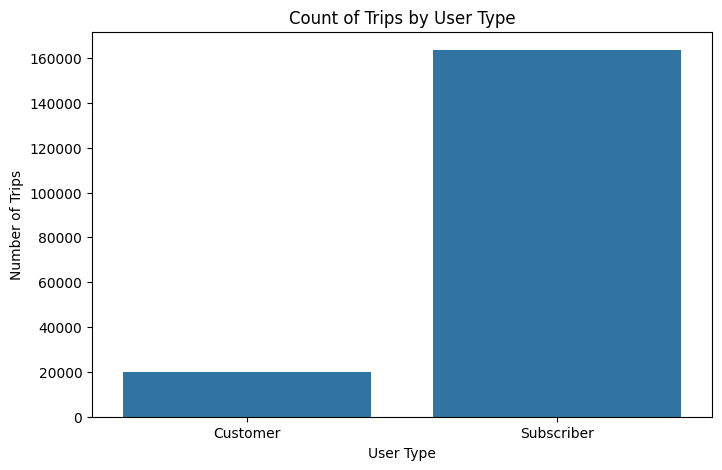

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='user_type')
plt.title('Count of Trips by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.show()

## Trip Duration by User Type (Box Plot with Log Scale)
This box plot compares trip durations between Subscribers and Customers. On a log scale, we observe that Customers tend to take longer trips on average, with a wider spread and higher median than Subscribers. Subscribers have shorter, more consistent trips, possibly due to daily commutes. The log scale helps reveal these patterns clearly by compressing the effect of long-duration outliers.



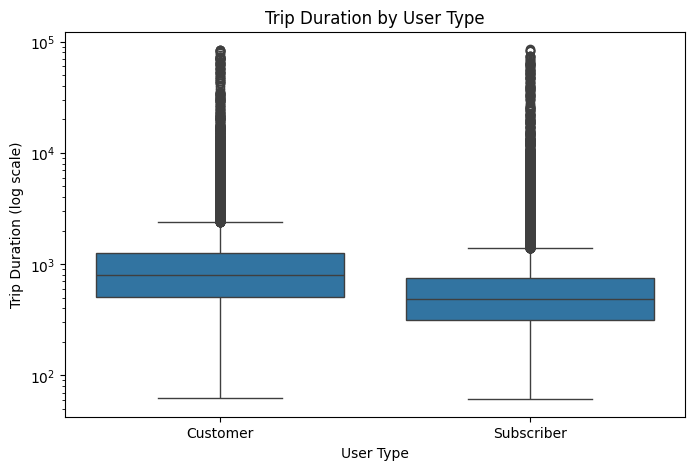

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='user_type', y='duration_sec')
plt.yscale('log')
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (log scale)')
plt.show()

## Facet Plot: Trip Count by Hour, User Type, and Gender
This facet plot shows how bike trips differs by the hour of the day across different user types (Subscribers and Customers) and genders. We limited trip durations to 3000 seconds to avoid distortion from very long trips.
The plot reveals clear patterns: Subscribers of all genders have two main peaks during the morning (around 8 AM) and evening (5–6 PM), which likely correspond to commuting times. Customers tend to ride more during the middle of the day, meaning it could be for fun or for casual use. Male users dominate the number of trips across all categories, while other genders have much lower trip counts. This visualization highlights how time of day usage depends on both user type and gender.

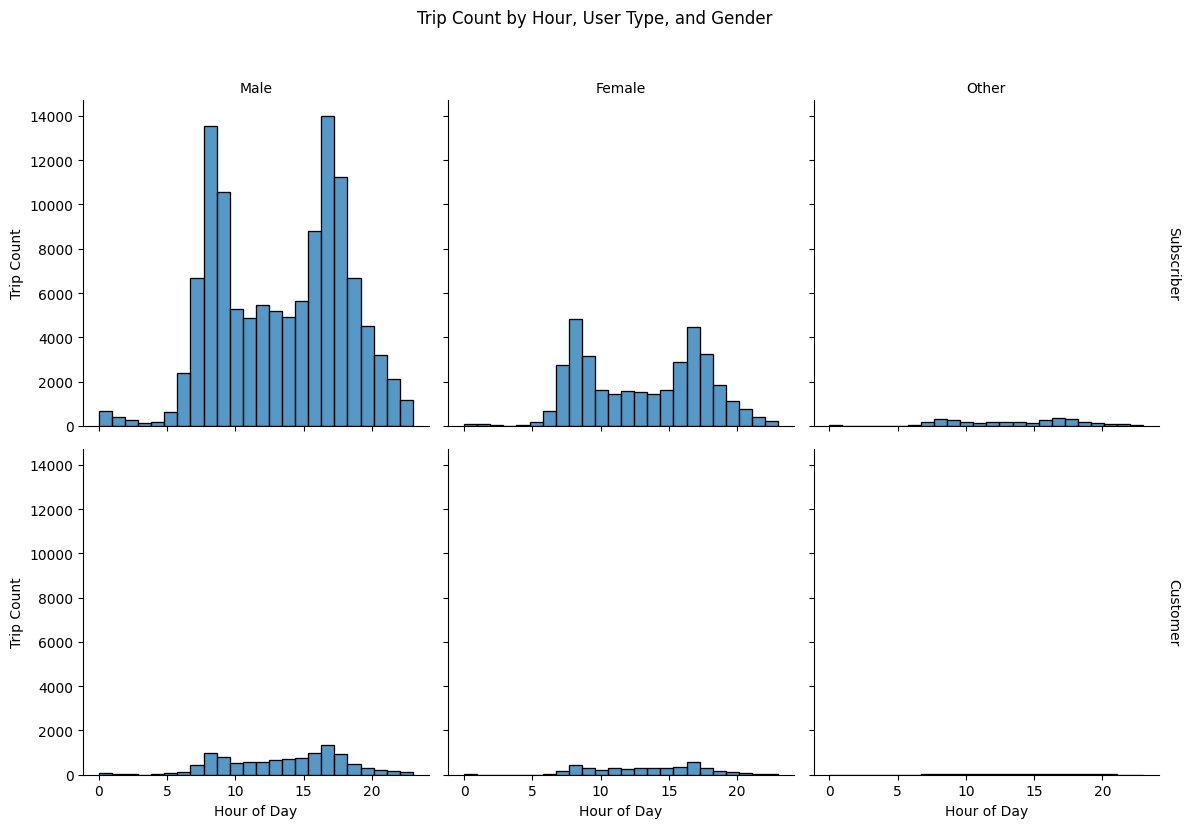

In [22]:
# Limit duration to 3000 sec to avoid long-tail distortion
filtered_df = df[df['duration_sec'] <= 3000]

g = sns.FacetGrid(filtered_df, col='member_gender', row='user_type', height=4, margin_titles=True)
g.map(sns.histplot, 'start_hour', bins=24)

g.set_axis_labels("Hour of Day", "Trip Count")
g.set_titles(row_template='{row_name}', col_template='{col_name}')
plt.suptitle('Trip Count by Hour, User Type, and Gender', y=1.03)
plt.tight_layout()
plt.show()

## Heatmap of Trip Counts by Age and Hour
This heatmap displays trip frequency across different age groups and hours of the day. You can see that younger riders (around ages 20–40) have higher trip volumes concentrated in the daytime and early evening hours, while older age groups show fewer trips overall. The heatmap clearly displays how bike-sharing usage changes with both age and time, providing insights into peak usage periods for different demographics.

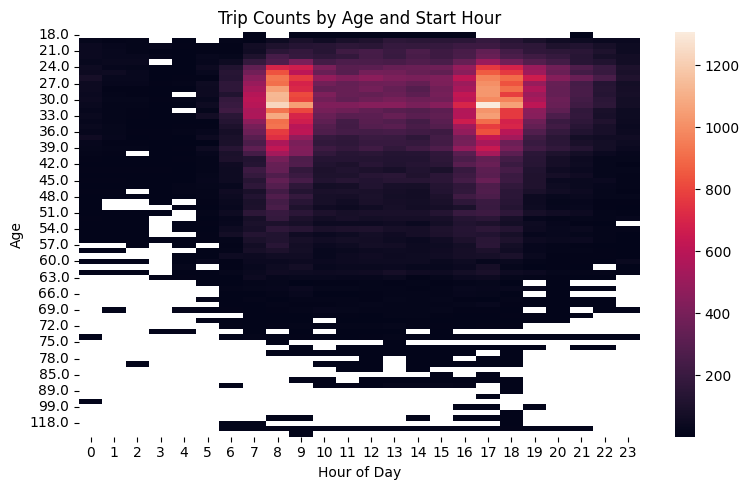

In [21]:
# groupby age and start_hour to count trips
age_hour_counts = df.groupby(['age', 'start_hour']).size().reset_index(name='trip_count')
heatmap_data = age_hour_counts.pivot(index='age', columns='start_hour', values='trip_count')

plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data)
plt.title('Trip Counts by Age and Start Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Age')
plt.tight_layout()
plt.show()